            group_A  group_B
date                        
2016-12-31        0        2
2017-01-01        1        2
2017-01-02        2        2
2017-01-03        3        2
2017-01-04        4        2
2017-01-05        5        2
2017-01-06        6        2
2017-01-07        7        2
2017-01-08        8        4
2017-01-09        9        4
        group_A    group_B
count  10.00000  10.000000
mean    4.50000   2.400000
std     3.02765   0.843274
min     0.00000   2.000000
25%     2.25000   2.000000
50%     4.50000   2.000000
75%     6.75000   2.000000
max     9.00000   4.000000
0.25    2.25
0.50    4.50
0.75    6.75
Name: group_A, dtype: float64
2.25
4.5
6.75
                    x               y
count  1000000.000000  1000000.000000
mean         0.001512       13.997395
std          0.999922        2.048911
min         -5.002299        3.000000
25%         -0.673551       13.000000
50%          0.002388       14.000000
75%          0.675724       15.000000
max          4.716662 

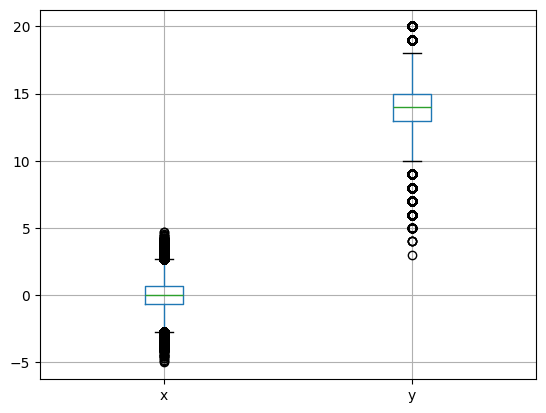

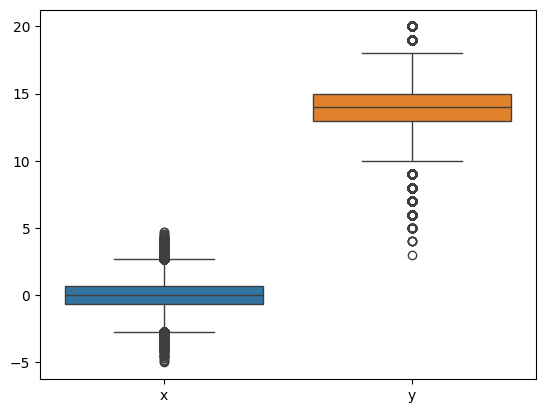

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom

"""
https://en.wikipedia.org/wiki/Quantile

"""
import sys

#create_new_column_from_substring_in_another_column
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO

# make data
str_data = r"""date,group_A,group_B
2016-12-31,0,2
2017-01-01,1,2
2017-01-02,2,2 
2017-01-03,3,2
2017-01-04,4,2
2017-01-05,5,2
2017-01-06,6,2
2017-01-07,7,2
2017-01-08,8,4
2017-01-09,9,4
"""
df = pd.read_csv(StringIO(str_data))
df.set_index(['date'], inplace=True)
# df.sort_index(inplace=True)
print(df)
print(df.describe())

# pandas
q = df['group_A'].quantile([0.25, 0.5, 0.75])
print(q)

# numpy
print(np.percentile(df['group_A'], 25))  # Q1
print(np.percentile(df['group_A'], 50))  # median
print(np.percentile(df['group_A'], 75))  # Q3

# normal distribution - 1st quartile = -0.67, 3rd quartile = 0.67
# binomial distribution - median = np (if np is an integer)
df = pd.DataFrame()
N = 1000000
df['x'] = np.random.RandomState(0).normal(0, 1, size=N)

n = 20
p = 0.7
df['y'] = np.random.RandomState(0).binomial(n, p, size=N)  # median = n * p
print(df.describe())
q = df['x'].quantile([0.25, 0.5, 0.75])
print(q)

print(np.percentile(df['x'], 25))  # Q1
print(np.percentile(df['x'], 50))  # median
print(np.percentile(df['x'], 75))  # Q3

print(np.percentile(df['y'], 25))  # Q1
print(np.percentile(df['y'], 50))  # median
print(np.percentile(df['y'], 75))  # Q3

# verify
print('normal:')
print(norm.ppf(.25))
print(norm.ppf(.50))
print(norm.ppf(.75))

print('binomial:')
print(binom.ppf(0.25, n, p))
print(binom.ppf(0.50, n, p))
print(binom.ppf(0.75, n, p))

# show
df.boxplot()
plt.show()

bplot = sns.boxplot(data=df)
plt.show()